In [297]:
import cv2
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [298]:
def _pick(L, ty, path):
    L_ = [cv2.imread(os.path.join(path, i)) for i in L if i.split('_')[0]==ty]
    return L_


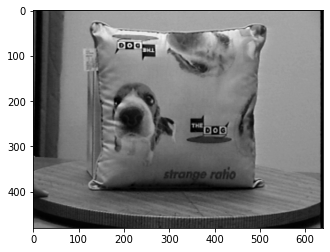

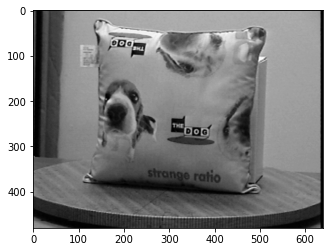

In [299]:
path = './img'
img_ty = 'Pillow'
IMG_L = _pick(os.listdir(path), img_ty, path)
# (u,v) = optical_flow(IMG_L[0], IMG_L[1], 16, tau=1e-2)

img_shape = IMG_L[1].shape[:2]
prev_image_gray = cv2.cvtColor(IMG_L[0], cv2.COLOR_BGR2GRAY)
current_image_gray = cv2.cvtColor(IMG_L[1], cv2.COLOR_BGR2GRAY)


fig1 = plt.figure()
plt.imshow(prev_image_gray, 'gray')

fig1 = plt.figure()
plt.imshow(current_image_gray, 'gray')



In [300]:
pt_x, pt_y = 250, 325

In [301]:
param = dict(pyr_scale=0.8,
            levels=25,
            iterations=1,
            winsize=5,
            poly_n=5,
            poly_sigma=1.1)

flow = None
XL, YL = [0], [0]
PX, PY = [pt_x], [pt_y]
for i in range(1000):
    if i==0:
        fg = 0
    else:
        fg = cv2.OPTFLOW_USE_INITIAL_FLOW
    flow = cv2.calcOpticalFlowFarneback(prev_image_gray, current_image_gray, flow=flow, flags=fg, **param)
    
    XL.append(flow[pt_y, pt_x, 0])
    YL.append(flow[pt_y, pt_x, 1])
    PX.append(int(pt_x + flow[pt_y, pt_x, 0]))
    PY.append(int(pt_y + flow[pt_y, pt_x, 1]))
    if i>0:
        ep = np.sum(np.abs(XL[i-1] - XL[i])) + np.sum(np.abs(YL[i-1] - YL[i]))
        print('iter:{}, ep:{}'.format(i, ep))
        if ep<1e-5:
            break

print(PX)
print(PY)

iter:1, ep:49.46323204040527
iter:2, ep:6.065606117248535
iter:3, ep:0.9292898178100586
iter:4, ep:11.275425910949707
iter:5, ep:74.32405853271484
iter:6, ep:2.8133392333984375e-05
iter:7, ep:1.0013580322265625e-05
iter:8, ep:2.8133392333984375e-05
iter:9, ep:2.5272369384765625e-05
iter:10, ep:8.630752563476562e-05
iter:11, ep:8.726119995117188e-05
iter:12, ep:7.915496826171875e-05
iter:13, ep:1.811981201171875e-05
iter:14, ep:3.4809112548828125e-05
iter:15, ep:4.6253204345703125e-05
iter:16, ep:7.295608520507812e-05
iter:17, ep:6.866455078125e-05
iter:18, ep:6.771087646484375e-05
iter:19, ep:4.6253204345703125e-05
iter:20, ep:6.961822509765625e-05
iter:21, ep:4.7206878662109375e-05
iter:22, ep:2.47955322265625e-05
iter:23, ep:4.673004150390625e-05
iter:24, ep:7.343292236328125e-05
iter:25, ep:2.86102294921875e-05
iter:26, ep:1.71661376953125e-05
iter:27, ep:7.390975952148438e-05
iter:28, ep:5.5789947509765625e-05
iter:29, ep:3.2901763916015625e-05
iter:30, ep:3.0517578125e-05
iter:31,

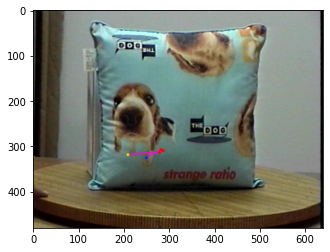

In [302]:
img = cv2.cvtColor(IMG_L[0], cv2.COLOR_BGR2RGB)

for j in range(len(PX)):
    if j!=0:
        cv2.line(img, (PX[j-1], PY[j-1]), (PX[j], PY[j]), (250, 5, 216), 2)

for k in range(len(PX)):
    if k==0:
        c = (0, 38, 255)
    elif k==len(PX)-1:
        c = (182, 255, 0)
    else:
        c = (255, 0, 0)
    cv2.circle(img,(PX[k], PY[k]), 3, c, -1)

    

fig = plt.figure()
plt.imshow(img)
plt.show()

In [303]:
cv2.imwrite('output.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True